In [1]:
!pip install networkx

In [431]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [1440]:
general=nx.DiGraph()

In [1441]:
def generate_directed_edges(H):
    edges = []
    
    # Create directed edges with given probability
    for j in range(7):
    
        for i in range(3):
            if j%2==0:
                edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                if i==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                else:
                    edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                    edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"P",{'weight': 2.25}))
            elif j%2!=0:
                edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                if i==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                else:
                    edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                    edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"L",{'weight': 2.25}))
 
        if j>0:
            edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j)+"P",str(H)+"0"+str(j+1)+"P",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j)+"P",{'weight': 4.1}))
    return edges




In [1442]:
edges=generate_directed_edges("H1")


general.add_edges_from(edges)
edges

[('H10101', 'H10103', {'weight': 3}),
 ('H10109', 'H10111', {'weight': 3}),
 ('H10103', 'H10105', {'weight': 3}),
 ('H10111', 'H10113', {'weight': 3}),
 ('H10107', 'H101S', {'weight': 3}),
 ('H101S', 'H10109', {'weight': 3}),
 ('H101L', 'H10101', {'weight': 2.25}),
 ('H10115', 'H101P', {'weight': 2.25}),
 ('H10105', 'H10107', {'weight': 3}),
 ('H10113', 'H10115', {'weight': 3}),
 ('H10107', 'H101S', {'weight': 3}),
 ('H101S', 'H10109', {'weight': 3}),
 ('H101L', 'H10101', {'weight': 2.25}),
 ('H10115', 'H101P', {'weight': 2.25}),
 ('H10201', 'H10203', {'weight': 3}),
 ('H10209', 'H10211', {'weight': 3}),
 ('H10203', 'H10205', {'weight': 3}),
 ('H10211', 'H10213', {'weight': 3}),
 ('H10207', 'H102S', {'weight': 3}),
 ('H102S', 'H10209', {'weight': 3}),
 ('H102P', 'H10201', {'weight': 2.25}),
 ('H10215', 'H102L', {'weight': 2.25}),
 ('H10205', 'H10207', {'weight': 3}),
 ('H10213', 'H10215', {'weight': 3}),
 ('H10207', 'H102S', {'weight': 3}),
 ('H102S', 'H10209', {'weight': 3}),
 ('H102P

In [1474]:
def draw_nodes(G,X=0,Y=0):
    pos={}
    nodes=np.array(G.nodes())
    for k in nodes:
        if str(k)=="H1Biuro":
            pos.update({k:[30+X,-5+Y]})
        elif str(k)=="H1Punkt rozładunku":
            pos.update({k:[30+X,-5+Y]})
        elif (str(k)).endswith("L"):
            pos.update({k:[-2+X,-int((str(k))[-2])+Y]})
        elif (str(k)).endswith("P"):
            pos.update({k:[40+X,-int((str(k))[-2])+Y]})           
        elif (str(k)).endswith("S"):
            pos.update({k:[18+X,-int((str(k))[-2])+Y]})
        elif int((str(k))[-3])%2!=0:
            if int((str(k))[-2])==0:
                if int((str(k))[-1])==9:
                    pos.update({k:[2*int((str(k))[-1])+4+X,-int((str(k))[-3])+Y]})
                else:
                    pos.update({k:[2*int((str(k))[-1])+X,-int((str(k))[-3])+Y]})
            else:
                pos.update({k:[2*(int((str(k))[-2]+(str(k))[-1])+2)+X,-int((str(k))[-3])+Y]})
        else:
            if int((str(k))[-3])%2==1:
                if int((str(k))[-2])==0:
                    if int((str(k))[-1])==9:
                        pos.update({k:[2*int((str(k))[-1])+4+X,-int((str(k))[-3])+Y]})
                    else:
                        pos.update({k:[2*int((str(k))[-1])+X,-int((str(k))[-3])+Y]})
                else:
                    pos.update({k:[2*(int((str(k))[-2]+(str(k))[-1])+2+X),-int((str(k))[-3])+Y]})
            else:
                if int((str(k))[-2])==0:
                    if int((str(k))[-1])==9:
                        pos.update({k:[int((str(k))[-1])+5+X,-int((str(k))[-3])+Y]})
                    else:
                        pos.update({k:[-2*(int((str(k))[-1]))+36+X,-int((str(k))[-3])+Y]})
                else:
                    pos.update({k:[-2*int((str(k))[-2]+(str(k))[-1])+32+X,-int((str(k))[-3])+Y]})
                    
    return pos

In [1454]:
pos=draw_nodes(general,5,5)
print(pos)

{'H10101': [7, 4], 'H10103': [11, 4], 'H10109': [27, 4], 'H10111': [31, 4], 'H10105': [15, 4], 'H10113': [35, 4], 'H10107': [19, 4], 'H101S': [23, 4], 'H101L': [3, 4], 'H10115': [39, 4], 'H101P': [45, 4], 'H10201': [39, 3], 'H10203': [35, 3], 'H10209': [19, 3], 'H10211': [15, 3], 'H10205': [31, 3], 'H10213': [11, 3], 'H10207': [27, 3], 'H102S': [23, 3], 'H102P': [45, 3], 'H10215': [7, 3], 'H102L': [3, 3], 'H10301': [7, 2], 'H10303': [11, 2], 'H10309': [27, 2], 'H10311': [31, 2], 'H10305': [15, 2], 'H10313': [35, 2], 'H10307': [19, 2], 'H103S': [23, 2], 'H103L': [3, 2], 'H10315': [39, 2], 'H103P': [45, 2], 'H10401': [39, 1], 'H10403': [35, 1], 'H10409': [19, 1], 'H10411': [15, 1], 'H10405': [31, 1], 'H10413': [11, 1], 'H10407': [27, 1], 'H104S': [23, 1], 'H104P': [45, 1], 'H10415': [7, 1], 'H104L': [3, 1], 'H10501': [7, 0], 'H10503': [11, 0], 'H10509': [27, 0], 'H10511': [31, 0], 'H10505': [15, 0], 'H10513': [35, 0], 'H10507': [19, 0], 'H105S': [23, 0], 'H105L': [3, 0], 'H10515': [39, 0

TypeError: get_edge_attributes() missing 1 required positional argument: 'name'

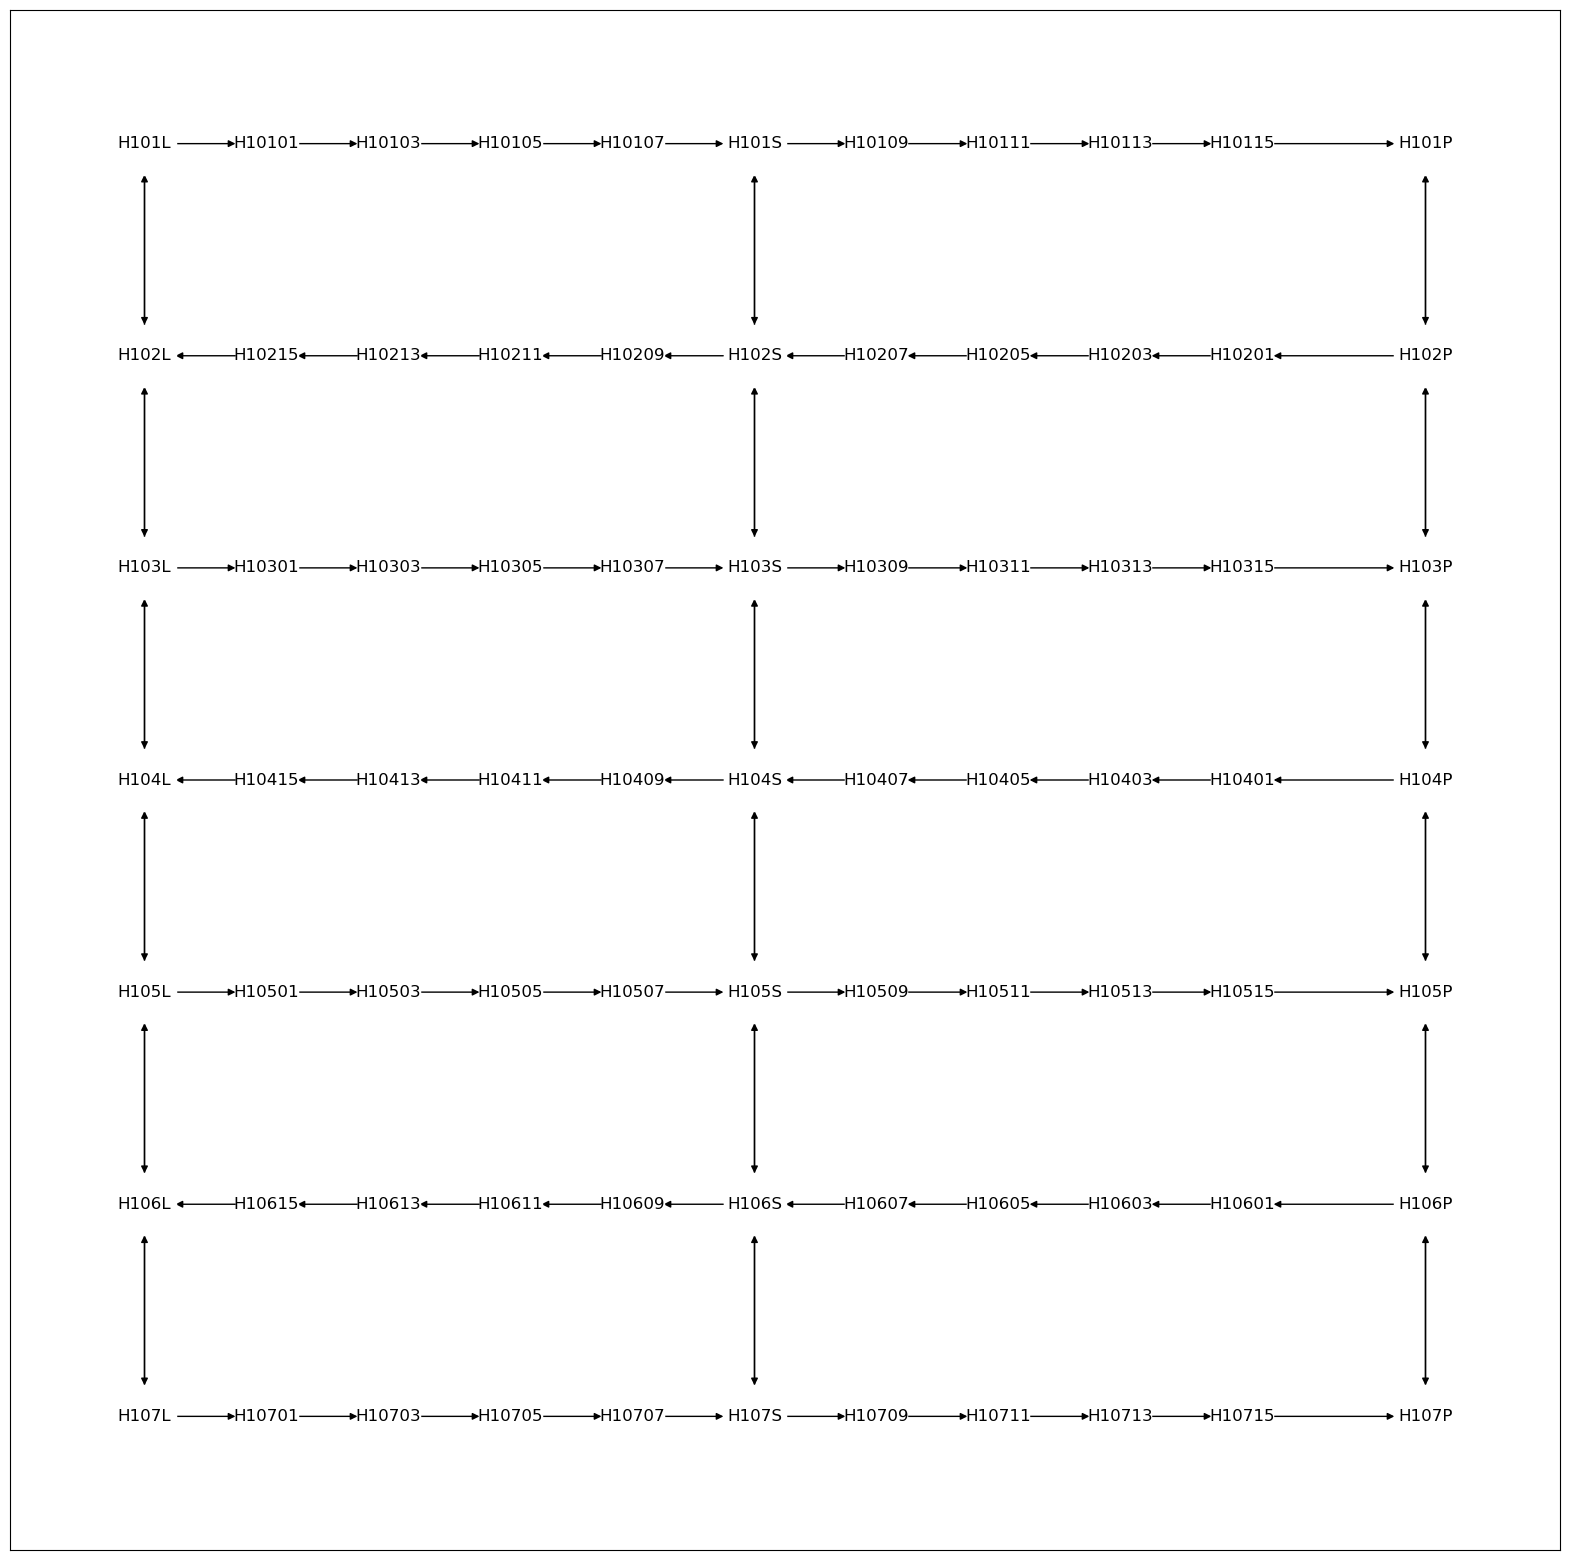

In [1455]:
general.add_edges_from(edges)
import matplotlib.pyplot as plt
pos=pos
plt.figure(figsize=(20, 20))
nx.draw_networkx(general,pos,node_size=2000,font_size=12,node_color="white")
labels = nx.get_edge_attributes(general)
nx.draw_networkx_edge_labels(general,pos,edge_labels=labels)
plt.savefig("kokos.png")

In [1356]:
import numpy as np
nodes=np.array(general.nodes())
print(nodes)

['H10101' 'H10103' 'H10109' 'H10111' 'H10105' 'H10113' 'H10107' 'H101S'
 'H101L' 'H10115' 'H101P' 'H10201' 'H10203' 'H10209' 'H10211' 'H10205'
 'H10213' 'H10207' 'H102S' 'H102P' 'H10215' 'H102L' 'H10301' 'H10303'
 'H10309' 'H10311' 'H10305' 'H10313' 'H10307' 'H103S' 'H103L' 'H10315'
 'H103P' 'H10401' 'H10403' 'H10409' 'H10411' 'H10405' 'H10413' 'H10407'
 'H104S' 'H104P' 'H10415' 'H104L' 'H10501' 'H10503' 'H10509' 'H10511'
 'H10505' 'H10513' 'H10507' 'H105S' 'H105L' 'H10515' 'H105P' 'H10601'
 'H10603' 'H10609' 'H10611' 'H10605' 'H10613' 'H10607' 'H106S' 'H106P'
 'H10615' 'H106L' 'H10701' 'H10703' 'H10709' 'H10711' 'H10705' 'H10713'
 'H10707' 'H107S' 'H107L' 'H10715' 'H107P']


In [1432]:
Office=nx.DiGraph()

In [1433]:
def generate_directed_edges_special(H,spc=None):
    
        
    edges = []
    
    # Create directed edges with given probability
    for j in range(7):
        if j>0 and j<4:
                edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j)+"P",str(H)+"0"+str(j+1)+"P",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j)+"P",{'weight': 4.1}))
        if j>3:
            for i in range(3):
                if j%2==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                    edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
                    edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
                    edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
                    edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
                elif j%2!=0:
                    if i==0:
                        edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    else:
                        edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"L",{'weight': 2.25}))
                        edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
                        edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
                        edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
            
        else:
            for i in range(3):
                if j%2==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                    if i==0:
                        edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    else:
                        edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                        edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"P",{'weight': 2.25}))
                elif j%2!=0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                    if i==0:
                        edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    else:
                        edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                        edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"L",{'weight': 2.25}))
        if spc!=None and spc.lower()=="b":
            what_room("Biuro",str(H),edges)
        elif spc!=None and spc.lower()=="c":
            what_room("Punkt rozładunku",str(H),edges)
    return edges




In [1434]:
def what_room(name,H,edges):
            for i in range(4):
                edges.append((str(H)+str(name),str(H)+"0"+str(7-i)+"S",{'weight': 8.5}))
            for i in range(4):
                    edges.append((str(H)+str(name),str(H)+"0"+str(7-3)+"0"+str(2*i+1),{'weight': 8.5}))
            edges.append((str(H)+str(name),str(H)+"0"+str(7-3)+"P",{'weight': 8.5}))
            

In [1435]:
else:
            print("0")
            for i in range(3):
            if j%2==0:
                edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
            elif j%2!=0:

SyntaxError: invalid syntax (2627687005.py, line 1)

In [1436]:
edges1=generate_directed_edges_special("H1",spc="b")

print(edges1)
Office.add_edges_from(edges1)


[('H10101', 'H10103', {'weight': 3}), ('H10109', 'H10111', {'weight': 3}), ('H10103', 'H10105', {'weight': 3}), ('H10111', 'H10113', {'weight': 3}), ('H10107', 'H101S', {'weight': 3}), ('H101S', 'H10109', {'weight': 3}), ('H101L', 'H10101', {'weight': 2.25}), ('H10115', 'H101P', {'weight': 2.25}), ('H10105', 'H10107', {'weight': 3}), ('H10113', 'H10115', {'weight': 3}), ('H10107', 'H101S', {'weight': 3}), ('H101S', 'H10109', {'weight': 3}), ('H101L', 'H10101', {'weight': 2.25}), ('H10115', 'H101P', {'weight': 2.25}), ('H1Biuro', 'H107S', {'weight': 8.5}), ('H1Biuro', 'H106S', {'weight': 8.5}), ('H1Biuro', 'H105S', {'weight': 8.5}), ('H1Biuro', 'H104S', {'weight': 8.5}), ('H1Biuro', 'H10401', {'weight': 8.5}), ('H1Biuro', 'H10403', {'weight': 8.5}), ('H1Biuro', 'H10405', {'weight': 8.5}), ('H1Biuro', 'H10407', {'weight': 8.5}), ('H1Biuro', 'H104P', {'weight': 8.5}), ('H101S', 'H102S', {'weight': 4.1}), ('H102S', 'H101S', {'weight': 4.1}), ('H101L', 'H102L', {'weight': 4.1}), ('H102L', '

In [1437]:
pos=draw_nodes(Office)
print(pos)

{'H10101': [2, -1], 'H10103': [6, -1], 'H10109': [22, -1], 'H10111': [26, -1], 'H10105': [10, -1], 'H10113': [30, -1], 'H10107': [14, -1], 'H101S': [18, -1], 'H101L': [-2, -1], 'H10115': [34, -1], 'H101P': [40, -1], 'H1Biuro': [30, -5], 'H107S': [18, -7], 'H106S': [18, -6], 'H105S': [18, -5], 'H104S': [18, -4], 'H10401': [34, -4], 'H10403': [30, -4], 'H10405': [26, -4], 'H10407': [22, -4], 'H104P': [40, -4], 'H102S': [18, -2], 'H102L': [-2, -2], 'H102P': [40, -2], 'H10201': [34, -2], 'H10203': [30, -2], 'H10209': [14, -2], 'H10211': [10, -2], 'H10205': [26, -2], 'H10213': [6, -2], 'H10207': [22, -2], 'H10215': [2, -2], 'H103S': [18, -3], 'H103L': [-2, -3], 'H103P': [40, -3], 'H10301': [2, -3], 'H10303': [6, -3], 'H10309': [22, -3], 'H10311': [26, -3], 'H10305': [10, -3], 'H10313': [30, -3], 'H10307': [14, -3], 'H10315': [34, -3], 'H104L': [-2, -4], 'H10409': [14, -4], 'H10411': [10, -4], 'H10413': [6, -4], 'H10415': [2, -4], 'H10501': [2, -5], 'H10503': [6, -5], 'H10507': [14, -5], 'H1

TypeError: get_edge_attributes() missing 1 required positional argument: 'name'

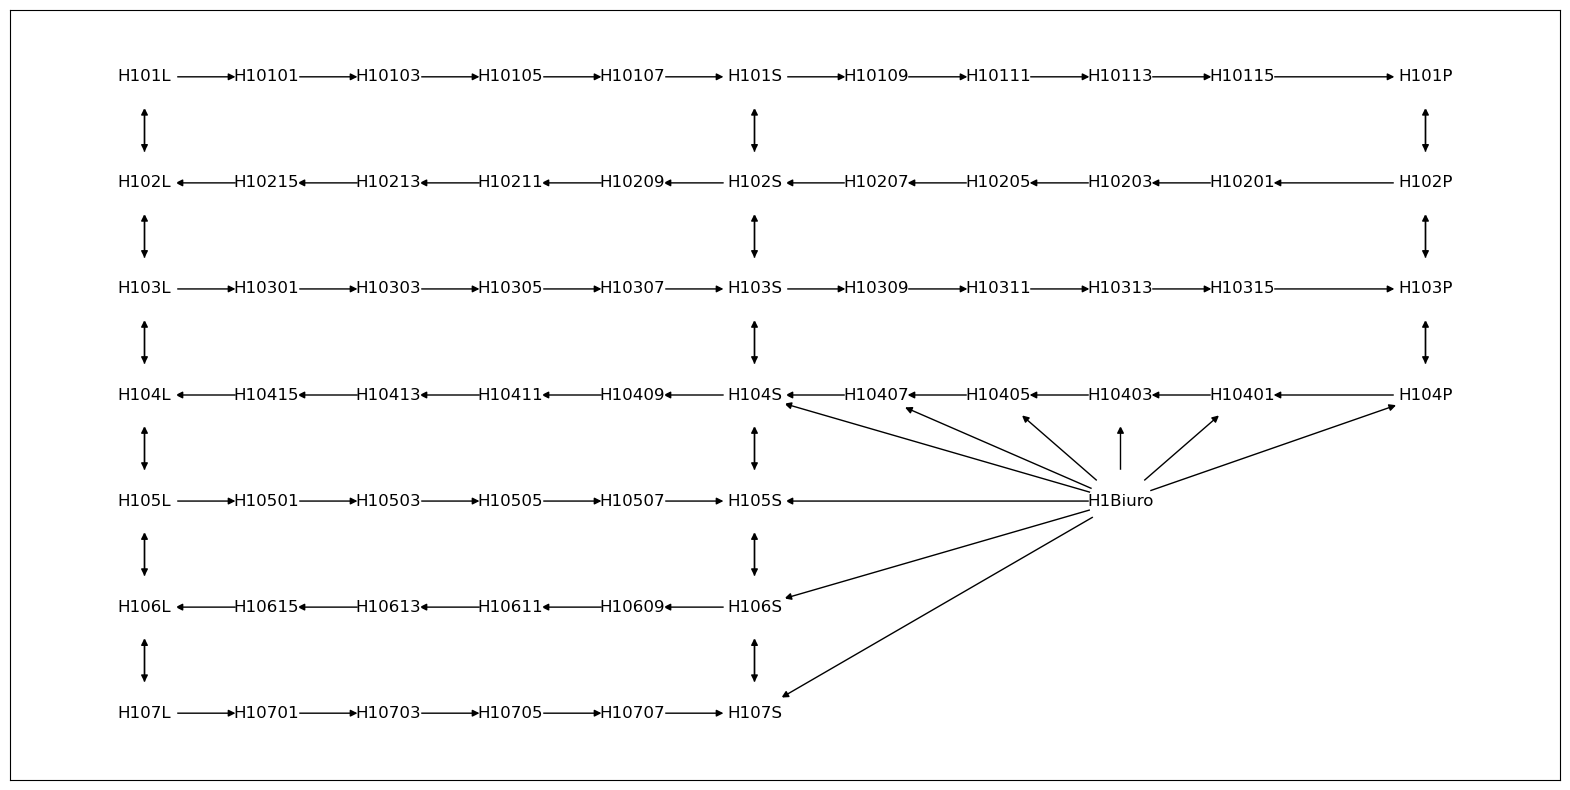

In [1416]:

import matplotlib.pyplot as plt
pos=pos
plt.figure(figsize=(20, 10))
nx.draw_networkx(Office,pos,node_size=2000,font_size=12,node_color="white")
labels = nx.get_edge_attributes(Office)
nx.draw_networkx_edge_labels(Office,pos,edge_labels=labels)
plt.savefig("kokos.png",transparent=True)

In [1383]:
H1=nx.DiGraph()
H2=nx.DiGraph()
H3=nx.DiGraph()
H4=nx.DiGraph()
H5=nx.DiGraph()

edges1=generate_directed_edges_special("H1",spc="B")
edges2=generate_directed_edges("H2")
edges3=generate_directed_edges("H3")
edges4=generate_directed_edges("H4")
edges5=generate_directed_edges_special("H5",spc="C")

H1.add_edges_from(edges1)
H2.add_edges_from(edges2)
H3.add_edges_from(edges3)
H4.add_edges_from(edges4)
H5.add_edges_from(edges5)

In [1384]:
all=nx.compose(H1,nx.compose(H2,nx.compose(H3,nx.compose(H4,H5))))

In [1389]:
all.nodes()

NodeView(('H10101', 'H10103', 'H10109', 'H10111', 'H10105', 'H10113', 'H10107', 'H101S', 'H101L', 'H10115', 'H101P', 'H1Biuro', 'H107S', 'H106S', 'H105S', 'H104S', 'H10401', 'H10403', 'H10405', 'H10407', 'H104P', 'H102S', 'H102L', 'H102P', 'H10201', 'H10203', 'H10209', 'H10211', 'H10205', 'H10213', 'H10207', 'H10215', 'H103S', 'H103L', 'H103P', 'H10301', 'H10303', 'H10309', 'H10311', 'H10305', 'H10313', 'H10307', 'H10315', 'H104L', 'H10409', 'H10411', 'H10413', 'H10415', 'H10501', 'H10503', 'H10507', 'H105L', 'H10505', 'H10609', 'H10611', 'H10613', 'H10615', 'H106L', 'H10701', 'H10703', 'H10707', 'H107L', 'H10705', 'H20101', 'H20103', 'H20109', 'H20111', 'H20105', 'H20113', 'H20107', 'H201S', 'H201L', 'H20115', 'H201P', 'H20201', 'H20203', 'H20209', 'H20211', 'H20205', 'H20213', 'H20207', 'H202S', 'H202P', 'H20215', 'H202L', 'H20301', 'H20303', 'H20309', 'H20311', 'H20305', 'H20313', 'H20307', 'H203S', 'H203L', 'H20315', 'H203P', 'H20401', 'H20403', 'H20409', 'H20411', 'H20405', 'H2041

In [1388]:
all.add_edge('H107S','H301S',weight = 4.1)
all.add_edge('H301S','H107S',weight = 4.1)
all.add_edge('H302L','H202P',weight = 4.1)
all.add_edge('H202P','H302L',weight = 4.1)
all.add_edge('H305L','H205P',weight = 4.1)
all.add_edge('H205P','H305L',weight = 4.1)
all.add_edge('H307S','H501S',weight = 4.1)
all.add_edge('H501S','H307S',weight = 4.1)

all.add_edge('H502L','H402P',weight = 4.1)
all.add_edge('H402P','H502L',weight = 4.1)
all.add_edge('H505L','H405P',weight = 4.1)
all.add_edge('H405P','H505L',weight = 4.1)
all.add_edge('H207S','H401S',weight = 4.1)
all.add_edge('H401S','H207S',weight = 4.1)

In [1475]:
pos=draw_nodes(H1,600,60)


TypeError: get_edge_attributes() missing 1 required positional argument: 'name'

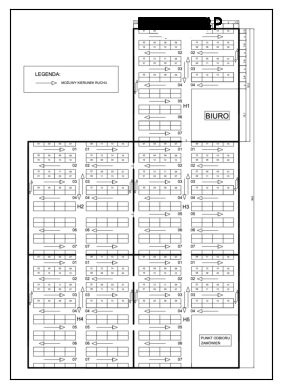

In [1476]:
img = plt.imread("magazyn.jpg")
fig, ax = plt.subplots()
ax.imshow(img)
nx.draw_networkx(H1,pos,node_color="white")
labels = nx.get_edge_attributes(H1)
nx.draw_networkx_edge_labels(H1,pos,edge_labels=labels)

In [1463]:
plt.savefig("kokos.png")

<Figure size 640x480 with 0 Axes>

TypeError: get_edge_attributes() missing 1 required positional argument: 'name'

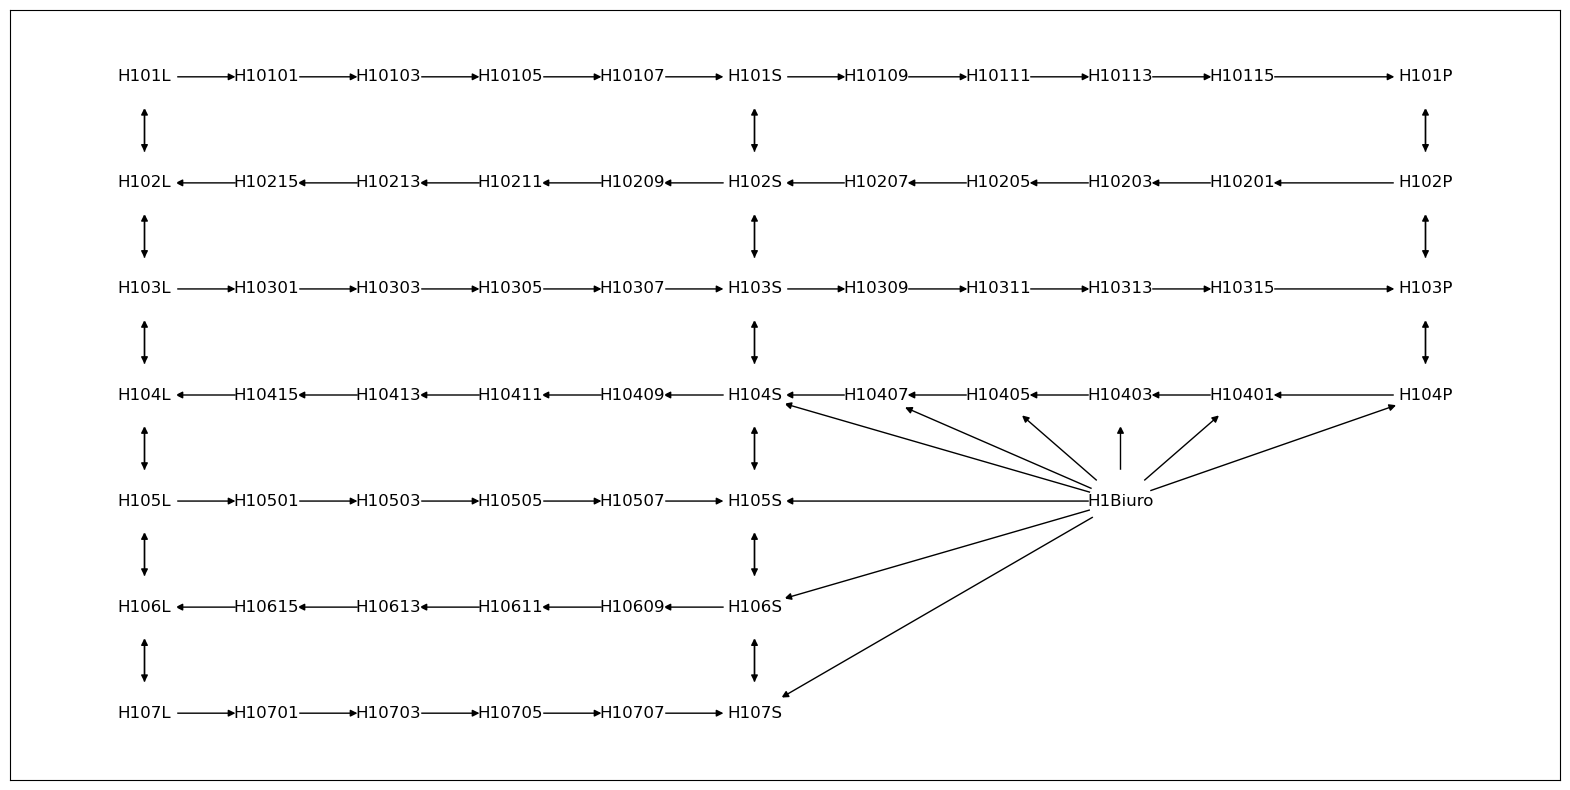

In [1461]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(H1,pos,node_color="white")
labels = nx.get_edge_attributes(H1)
nx.draw_networkx_edge_labels(H1,pos,edge_labels=labels)
plt.savefig("kokos.png",transparent=True)